In [ ]:
# Checking life expectancy for countries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [106]:
df.describe()

,Unnamed: 0,life_expectancy,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,total_expenditure,gdp,thinness_till19,inf_death,school,population,pop_size,death_ratio
count,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.00000,1605.000000,1605.000000,1605.000000,1605.000000,1.605000e+03,1605.000000,1605.000000
mean,1419.038629,69.330841,4.458928,79.333956,2278.527726,38.105171,83.492835,84.166978,1.618318,5.94157,5298.447254,4.875701,33.411838,12.084984,1.480183e+07,1.988785,60.735599
std,842.708819,8.201563,4.003677,25.546605,10217.632511,19.716020,22.520691,21.539693,4.817971,2.27946,10867.609070,4.613739,122.348779,2.770042,7.136442e+07,0.810544,70.808566
min,0.000000,46.200000,0.010000,2.000000,0.000000,2.000000,3.000000,2.000000,0.100000,0.74000,1.681350,0.100000,1.000000,4.200000,3.400000e+01,1.000000,0.001538
25%,645.000000,64.600000,0.700000,75.000000,0.000000,19.500000,81.000000,82.000000,0.100000,4.40000,464.184650,1.700000,1.000000,10.400000,1.912660e+05,1.000000,6.675000
50%,1457.000000,71.700000,3.690000,91.000000,13.000000,43.800000,93.000000,92.000000,0.100000,5.82000,1578.423900,3.100000,3.000000,12.300000,1.382517e+06,2.000000,27.437500
75%,2122.000000,74.900000,7.260000,96.000000,375.000000,55.700000,97.000000,97.000000,0.700000,7.44000,4682.728424,7.000000,22.000000,13.900000,7.492561e+06,3.000000,97.000000
max,2930.000000,85.000000,17.870000,99.000000,131441.000000,77.100000,99.000000,99.000000,49.900000,14.39000,119172.741800,27.200000,1600.000000,20.600000,1.293859e+09,3.000000,346.500000


In [114]:
df = pd.read_csv('refined_life_expect.csv')
print(df.shape)

#remove fragmanted data
df.dropna(inplace=True)

# make sure that there's still enough data to work with
print(df.shape)

(2938, 21)
(166, 21)


In [83]:
# # remove 1% from the tail ends of our the data for life expectancy
# IQR = [df.life_expectancy.quantile(0.99), df.life_expectancy.quantile(0.01)]
# df = df[df.life_expectancy < IQR[0]] 
# df = df[df.life_expectancy > IQR[1]] 
# print(df.shape)

(1605, 19)


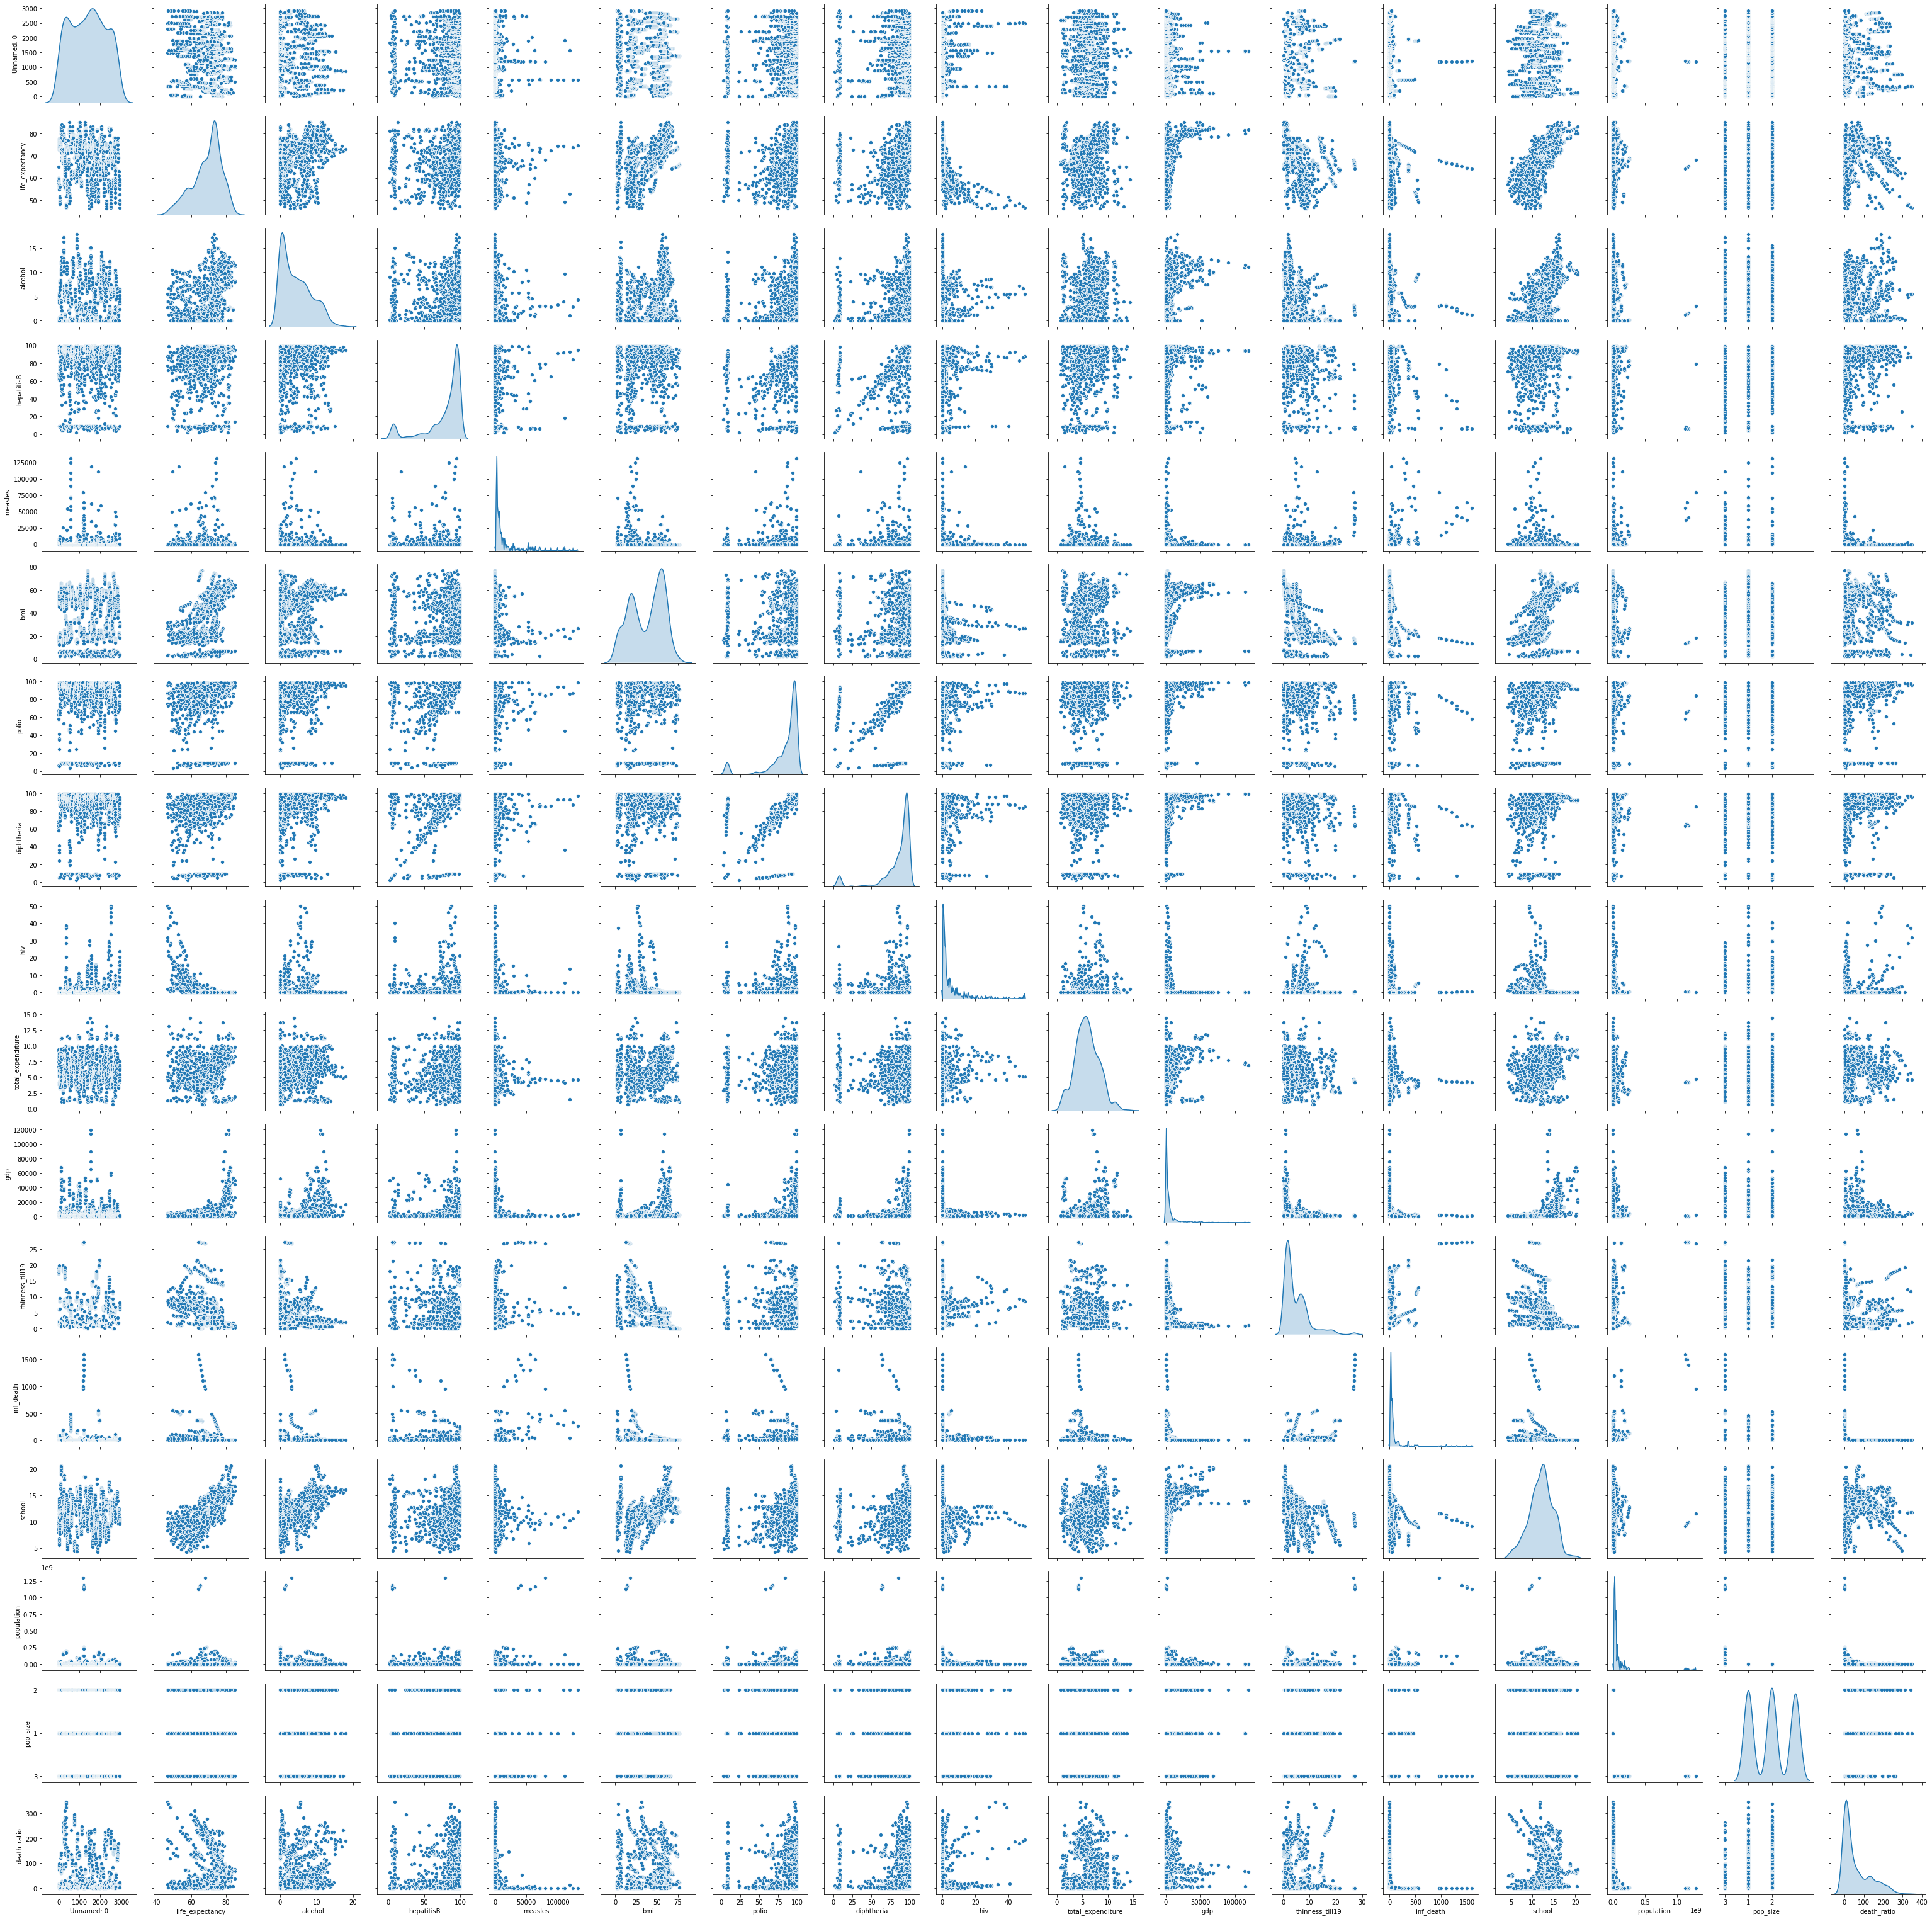

In [4]:
# check for correlations between the different variables
sns.pairplot(df, diag_kind="kde", height=2.5)

In [113]:
# from the paired plot using the columns we believe alcohol, bmi, hiv, gdp, 
# how thin, schooling, how big the countries, the ratio between adult to infant mortality,
#the interactions between bmi+alcohol (lifestyle), the interaction between population+gdp, 
#and if the country is big/medium/small

new_df = pd.DataFrame({'life_expectancy': df['life_expectancy'],
                        'alcohol': df['alcohol'],
                        'bmi': df['bmi'],
                        'hiv': df['hiv'],
                        'gdp': df['gdp'],
                        'thinness_till19': df['thinness_till19'],
                        'inf_death': df['inf_death'],
                        'school': df['school'],
                        'death_ratio': df['death_ratio'],
                        'lifestyle': df['bmi']*df['alcohol'],
                        'pop_gdp': df['gdp']*df['pop_size'],
                        'pop_size': df['pop_size'],
                        'very_lean': df['very_lean']
                        })

# check for multicollinearity and remove highgly correlated variables
corr_map = new_df.corr()

KeyError: 'very_lean'

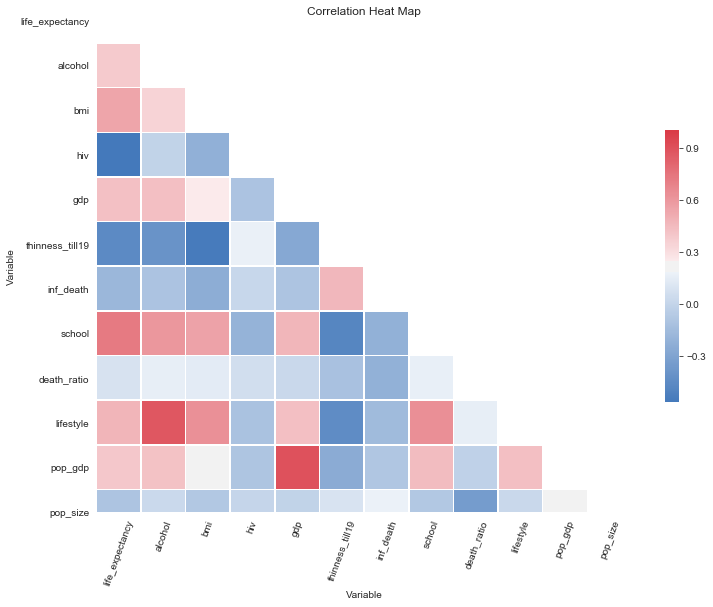

In [85]:
def CorrMtx(df, dropDuplicates = True, xrot=70, yrot=0, label='Variable'):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(12, 10))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    # add titles
    plt.title("Correlation Heat Map")
   
    

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xlabel(label)
        plt.ylabel(label)
        plt.xticks(rotation=xrot)
        plt.yticks(rotation=yrot)
        
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xlabel(label)
        plt.ylabel(label)
        plt.xticks(rotation=xrot)
        plt.yticks(rotation=yrot)
    return

CorrMtx(corr_map)

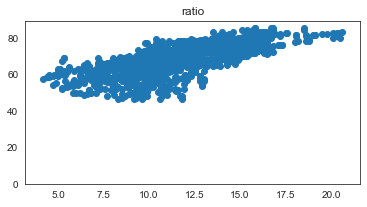

In [112]:
def create_hist(data, transform=None, title=None):
    if transform == 'log':
        data = np.log(data)
    elif transform == 'sqrt':
        data = np.cbrt(data)
    elif transform == 'cube':
        data = np.cbrt(data)
    
    plt.figure(figsize=(6,3))
    plt.hist(data, density=True)
    plt.title(title)
    plt.show
    return

create_hist(new_df['school'], transform=None ,title="ratio")
plt.scatter(new_df['school'], new_df['life_expectancy'])

In [ ]:
colors = ['red','blue','green','black','orange','purple','pink']
count=0
for region in list(zip(data['Region'].unique(),colors)):
    plots = sns.jointplot(x='relative_country_income',
                  y='Average Primary School Completion',
                  data=data[data['Region']==region[0]],
                  color=region[1], label=region[0], kind='reg',
                  ylim=(0,140))
    plots.fig.suptitle('Income vs Primary School Completion in '+region[0],y=1.03,fontsize=20)
    plots.annotate(stats.pearsonr)
    count+=1

In [ ]:
y = new_df.life_expectancy

xhiv = np.log(new_df['hiv'])
xalco = new_df['alcohol']
xbmi = new_df['bmi']
xgdp = np.log(new_df['gdp'])
xinf = np.cbrt(new_df['inf_death'])
xthin = new_df['thinness_till19']
def create_subplot(type='hist', data, rows=1, columns=1)
fig, axs = plt.subplots(2, 3)
axs[0, 0].hist(xhiv)
axs[0, 0].set_title('Axis [0,0]')

axs[0, 1].hist(xbmi)
axs[0, 1].set_title('Axis [0,1]')

axs[0, 2].hist(xgdp)
axs[0, 2].set_title('Axis [0,1]')

axs[1, 0].hist(xalco)
axs[1, 0].set_title('Axis [1,0]')

axs[1, 1].hist(xinf)
axs[1, 1].set_title('Axis [1,1]')

axs[1, 2].hist(xthin)
axs[1, 2].set_title('Axis [1,2]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


In [86]:
# transform our independent variable to look more normally distrubuted so model will fit better 
new_df.hiv = new_df['hiv'].apply(np.log)
new_df.pop_gdp = new_df['pop_gdp'].apply(np.log)
new_df.gdp = new_df['gdp'].apply(np.log)
new_df.inf_death =new_df['inf_death'].apply(np.cbrt)
new_df.death_ratio = new_df['death_ratio'].apply(np.sqrt)

In [87]:
# first model to test our feature's significance
lr_model = ols(formula='life_expectancy~alcohol+hiv+bmi+gdp+thinness_till19+inf_death+C(pop_size)+school+death_ratio+lifestyle+pop_gdp', data=new_df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     546.1
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:25:07   Log-Likelihood:                -4400.4
No. Observations:                1605   AIC:                             8825.
Df Residuals:                    1593   BIC:                             8889.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           53.6656      0.802     66.953      0.000      52.093      55.238
C(pop_size)[T.2]    -0.4051      0.182     -2.230      0.026      -0.761      -0.049
C(pop_size)[T.3]    -0.0945      0.156     -0.606      0.544      -0.400       0.211
alcohol              0.0997      0.064      1.550      0.121      -0.026       0.226
hiv                 -2.8511      0.074    -38.545      0.000      -2.996      -2.706
bmi                  0.0207      0.009      2.358      0.019       0.003       0.038
gdp                  0.4129      0.117      3.534      0.000       0.184       0.642
thinness_till19     -0.0608      0.028     -2.192      0.029      -0.115      -0.006
inf_death           -0.7324      0.097     -7.568      0.000      -0.922      -0.543
school               0.9079      0.058     15.682      0.000       0.794       1.021
death_ratio         -0.1675      0.029     -5.798      0.000      -0.224      -0.111
lifestyle           -0.0011      0.001     -0.898      0.370      -0.004       0.001
pop_gdp              0.0284      0.107      0.265      0.791      -0.182       0.239
==============================================================================
Omnibus:                       23.796   Durbin-Watson:                   0.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.068
Skew:                          -0.202   Prob(JB):                     2.96e-07
Kurtosis:                       3.535   Cond. No.                     1.53e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.28e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [88]:
#adjusting the model - remove features that were not statistically significant (alcohol, pop_gpd, lifestyle)
lr_model = ols(formula='life_expectancy~hiv+bmi+gdp+thinness_till19+inf_death+school+death_ratio', data=new_df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     855.8
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:25:29   Log-Likelihood:                -4403.7
No. Observations:                1605   AIC:                             8823.
Df Residuals:                    1597   BIC:                             8866.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          53.2680      0.717     74.274      0.000      51.861      54.675
hiv                -2.8314      0.072    -39.428      0.000      -2.972      -2.690
bmi                 0.0153      0.006      2.383      0.017       0.003       0.028
gdp                 0.4581      0.068      6.713      0.000       0.324       0.592
thinness_till19    -0.0753      0.027     -2.818      0.005      -0.128      -0.023
inf_death          -0.7018      0.094     -7.442      0.000      -0.887      -0.517
school              0.9532      0.051     18.555      0.000       0.852       1.054
death_ratio        -0.1621      0.028     -5.793      0.000      -0.217      -0.107
==============================================================================
Omnibus:                       22.143   Durbin-Watson:                   0.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.329
Skew:                          -0.199   Prob(JB):                     1.16e-06
Kurtosis:                       3.501   Cond. No.                         349.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(1605, 12)

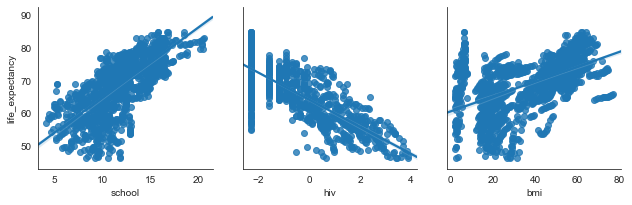

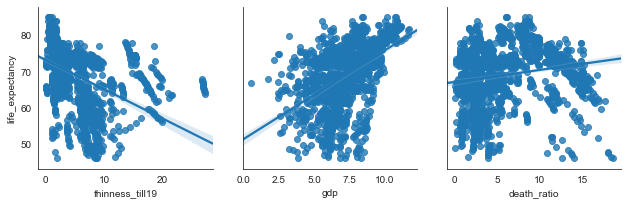

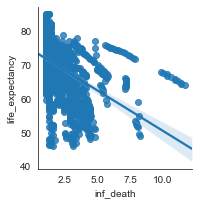

In [89]:
# after running the model again, more features became insignificant and we're dropped (pop_size)
depended = ['life_expectancy']
features = ['school', 'hiv', 'bmi', 'thinness_till19', 'gdp',
            'death_ratio', 'inf_death'] 

# looking at our data again to try and locate outliers
def get_pairs(data, row_groups, depended, features, n):
    row_groups = [features[i:i+n] for i in range(0, len(features), n)]

    for ind in row_groups:
        plot = sns.pairplot(x_vars=ind, y_vars=depended, data=data, kind="reg", height=3)
    return

get_pairs(new_df, row_groups, depended, features, 3)
new_df.shape

,life_expectancy,alcohol,bmi,hiv,gdp,thinness_till19,inf_death,school,death_ratio,lifestyle,pop_gdp,pop_size
0,65.0,0.01,19.1,-2.302585,6.370345,17.2,3.957892,10.1,2.059596,0.191,7.468957,3
1,59.9,0.01,18.6,-2.302585,6.417870,17.5,4.000000,10.0,2.057760,0.186,6.417870,1
2,59.9,0.01,18.1,-2.302585,6.448486,17.7,4.041240,9.9,2.015095,0.181,7.547098,3
3,59.5,0.01,17.6,-2.302585,6.507217,17.9,4.101566,9.8,1.985454,0.176,7.200364,2
4,59.2,0.01,17.2,-2.302585,4.151626,18.2,4.140818,9.5,1.968055,0.172,4.844773,2


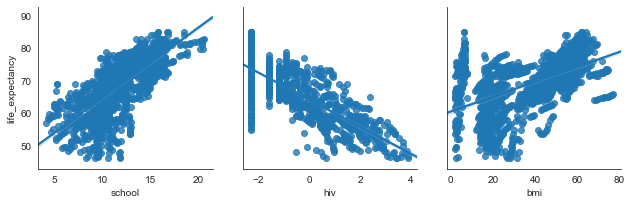

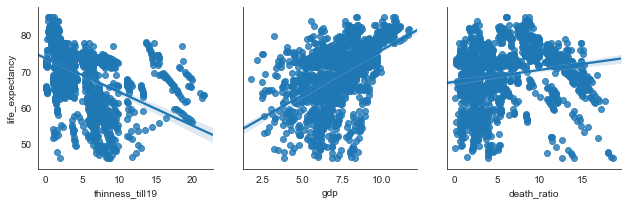

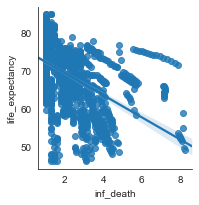

In [90]:
# remove outliers and check the amount of data that we left
new_df = new_df[new_df.gdp > 1.25] 
new_df = new_df[new_df.thinness_till19 < 25]

get_pairs(new_df, row_groups, depended, features, 3)
new_df.shape
new_df.head()

In [50]:
# running the model after removing the outlier
id_lr_model = ols(formula='life_expectancy~hiv+gdp+bmi+thinness_till19+inf_death+school+death_ratio', data=new_df).fit()
id_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     738.5
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        10:53:57   Log-Likelihood:                -4151.6
No. Observations:                1513   AIC:                             8319.
Df Residuals:                    1505   BIC:                             8362.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          55.8474      0.825     67.661      0.000      54.228      57.466
hiv                -2.7556      0.073    -37.680      0.000      -2.899      -2.612
bmi                 0.0116      0.007      1.720      0.086      -0.002       0.025
gdp                 0.3371      0.073      4.621      0.000       0.194       0.480
thinness_till19    -0.1189      0.028     -4.189      0.000      -0.175      -0.063
inf_death          -0.9716      0.109     -8.902      0.000      -1.186      -0.758
school              0.8939      0.054     16.586      0.000       0.788       1.000
death_ratio        -0.1819      0.030     -6.097      0.000      -0.240      -0.123
==============================================================================
Omnibus:                       17.442   Durbin-Watson:                   0.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.712
Skew:                          -0.167   Prob(JB):                     1.93e-05
Kurtosis:                       3.483   Cond. No.                         384.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
# removing bmi and testing our model
X = new_df[['hiv','bmi', 'death_ratio','school','gdp', 'thinness_till19', 'inf_death']].values
y = new_df.life_expectancy.values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
print(model.intercept_)
print(model.coef_)

[55.25850054]
[[-2.85659356  0.00941479 -0.19522203  0.87046239  0.48337074 -0.11943831
  -1.00932607]]


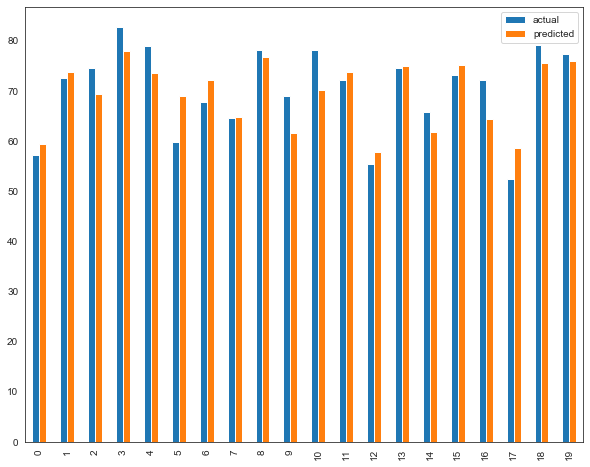

In [102]:
y_predict = model.predict(x_test)
predict_df = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_predict.flatten()})
plot_df = predict_df.head(20)
plot_df.plot(kind='bar', figsize=(10,8))

In [103]:
print('mean absolete error:', metrics.mean_absolute_error(y_test, y_predict))
print('mean squared error:', metrics.mean_squared_error(y_test, y_predict))
print('root squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

mean absolete error: 2.856767990559526
mean squared error: 13.904908906116399
root squared error: 3.7289286539321718
